# Neural network basics

Welcome to the `04_neural_network_basics` notebook. This part of the portfolio emphasises on building and understanding neural networks.

Throughout this notebook, topics such as defining neural network architectures and implementing both forward and backward propagation are explored. It also covers training procedures, model evaluation, and techniques to save and load trained models.

## Table of contents

1. [Understanding neural networks](#understanding-neural-networks)
2. [Setting up the environment](#setting-up-the-environment)
3. [Building a neural network](#building-a-neural-network)
4. [Forward propagation](#forward-propagation)
5. [Loss function](#loss-function)
6. [Backpropagation](#backpropagation)
7. [Training the neural network](#training-the-neural-network)
8. [Evaluating the model](#evaluating-the-model)
9. [Saving and loading the model](#saving-and-loading-the-model)
10. [Optimizations](#optimizations)
11. [Handling real-world data](#handling-real-world-data)
12. [Further exercises](#further-exercises)

## Understanding neural networks

Neural networks are a foundational technique in machine learning and artificial intelligence, utilized for identifying patterns and relationships within data. Unlike traditional algorithms, which often rely on predefined rules, neural networks learn directly from examples, making them highly adaptable and powerful. These models can handle a variety of tasks, from classification to regression, by adjusting their parameters through training, thereby improving their performance with more data and experience.

### **Key concepts**

#### **Neurons and layers**
Neural networks are inspired by the structure and function of the human brain, consisting of interconnected units called neurons. These neurons are organized into layers: the input layer, hidden layers, and the output layer.

- **Input layer**: The first layer in the network that receives the input data. Each neuron in this layer represents a feature of the input data.
- **Hidden layers**: Layers between the input and output layers. These layers perform various transformations on the inputs received, allowing the network to learn complex patterns. There can be multiple hidden layers, which is why deep neural networks are also known as deep learning models.
- **Output layer**: The final layer that produces the output of the network. The number of neurons in this layer corresponds to the number of desired outputs.

#### **Activation functions**
Activation functions introduce non-linearity into the network, enabling it to learn and model complex relationships in the data. Without activation functions, the network would only be able to model linear relationships.

- **ReLU (Rectified Linear Unit)**: Outputs the input directly if it is positive; otherwise, it outputs zero. It is widely used due to its simplicity and effectiveness.
- **Sigmoid**: Compresses the input to a range between 0 and 1. It is often used in binary classification problems.
- **Tanh (Hyperbolic tangent)**: Compresses the input to a range between -1 and 1, centering the data. It is often used in practice but can lead to issues with gradient vanishing.

#### **Forward propagation**
Forward propagation is the process of passing input data through the network to obtain an output. During this process, each neuron computes a weighted sum of its inputs, adds a bias term, and applies an activation function to produce its output. The output of one layer becomes the input to the next layer, and this process continues until the final output layer.

#### **Loss function**
The loss function measures the difference between the predicted outputs and the actual targets. It quantifies how well the neural network is performing. The goal of training the network is to minimize this loss.

- **Mean Squared Error (MSE)**: Commonly used for regression tasks, it calculates the average squared difference between predicted and actual values.
- **Cross-entropy loss**: Used for classification tasks, it measures the difference between the predicted probability distribution and the actual distribution.

#### **Backpropagation**
Backpropagation is the process of updating the network's weights to minimize the loss. It involves calculating the gradient of the loss function with respect to each weight and adjusting the weights in the opposite direction of the gradient. This ensures that the loss decreases with each iteration.

#### **Optimizers**
Optimizers are algorithms that adjust the weights of the network to minimize the loss. They use the gradients calculated during backpropagation to update the weights.

- **Stochastic Gradient Descent (SGD)**: Updates the weights using a small, randomly chosen subset of the data (a mini-batch). This makes the optimization process faster and allows the model to learn from a diverse set of examples.
- **Adam (Adaptive Moment Estimation)**: An extension of SGD that adapts the learning rate for each parameter, making it more efficient and robust in practice.

#### **Training and validation**
Training a neural network involves iteratively feeding data through the network, calculating the loss, and updating the weights. This process is repeated for a specified number of epochs (complete passes through the training dataset).

- **Training set**: The subset of data used to train the model.
- **Validation set**: A separate subset of data used to evaluate the model's performance during training, helping to tune hyperparameters and prevent overfitting.

#### **Overfitting and underfitting**
- **Overfitting**: Occurs when the model learns the training data too well, capturing noise and specific patterns that do not generalize to new data. This results in poor performance on the validation set.
- **Underfitting**: Occurs when the model is too simple to capture the underlying patterns in the data, leading to poor performance on both the training and validation sets.

#### **Regularization techniques**
Regularization techniques are used to prevent overfitting by adding constraints or penalties to the model.

- **Dropout**: Randomly drops a fraction of neurons during training, forcing the network to learn redundant representations and improving generalization.
- **L2 regularization (Ridge)**: Adds a penalty proportional to the sum of the squares of the weights, discouraging large weights and promoting simpler models.

#### **Model evaluation**
After training, the model's performance is evaluated on a test set that was not seen during training. This provides an unbiased estimate of how well the model generalizes to new data.

- **Accuracy**: The proportion of correctly classified instances out of the total instances.
- **Precision, recall, and F1 score**: Metrics that provide deeper insights into the model's performance, especially for imbalanced datasets.

### **Maths**

#### **Forward propagation**

Forward propagation is the process by which input data passes through the network to generate an output. It involves the following steps:

##### **Weighted sum**
For a given neuron $ j $ in layer $ l $, the input $ z_j^{(l)} $ is computed as:
$$ z_j^{(l)} = \sum_{i=1}^{n} w_{ij}^{(l-1)} a_i^{(l-1)} + b_j^{(l)} $$
where:
- $ w_{ij}^{(l-1)} $ is the weight connecting neuron $ i $ in layer $ l-1 $ to neuron $ j $ in layer $ l $.
- $ a_i^{(l-1)} $ is the activation of neuron $ i $ in layer $ l-1 $.
- $ b_j^{(l)} $ is the bias term for neuron $ j $ in layer $ l $.
- $ n $ is the number of neurons in layer $ l-1 $.

##### **Activation function**
The output $ a_j^{(l)} $ of neuron $ j $ in layer $ l $ is obtained by applying an activation function $ f $ to the weighted sum:
$$ a_j^{(l)} = f(z_j^{(l)}) $$

Common activation functions include:
- **Sigmoid**: $ f(z) = \frac{1}{1 + e^{-z}} $
- **Tanh**: $ f(z) = \tanh(z) $
- **ReLU (Rectified Linear Unit)**: $ f(z) = \max(0, z) $

#### **Loss function**

The loss function quantifies the difference between the predicted output and the actual target. The goal of training a neural network is to minimize this loss. Common loss functions include:

- **Mean Squared Error (MSE)**: Used for regression tasks, defined as:
  $$ \text{MSE} = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y_i})^2 $$
  where $ y_i $ is the true value and $ \hat{y_i} $ is the predicted value.
- **Cross-entropy loss**: Used for classification tasks, defined as:
  $$ \text{Cross-Entropy} = -\frac{1}{m} \sum_{i=1}^{m} \sum_{j=1}^{k} y_{ij} \log(\hat{y_{ij}}) $$
  where $ y_{ij} $ is the binary indicator (0 or 1) if class label $ j $ is the correct classification for input $ i $, and $ \hat{y_{ij}} $ is the predicted probability of $ i $ being in class $ j $.

#### **Backpropagation**

Backpropagation is the process of adjusting the network's weights to minimize the loss. It involves calculating the gradient of the loss function with respect to each weight and updating the weights using gradient descent.

##### **Gradient descent**
The weight update rule for gradient descent is:
$$ w_{ij} = w_{ij} - \eta \frac{\partial L}{\partial w_{ij}} $$
where:
- $ \eta $ is the learning rate, a hyperparameter that controls the step size of the update.
- $ \frac{\partial L}{\partial w_{ij}} $ is the partial derivative of the loss function with respect to the weight $ w_{ij} $.

##### **Calculating gradients**
The gradients are computed using the chain rule of calculus. For a given weight $ w_{ij} $, the gradient is calculated as:
$$ \frac{\partial L}{\partial w_{ij}} = \frac{\partial L}{\partial a_j} \cdot \frac{\partial a_j}{\partial z_j} \cdot \frac{\partial z_j}{\partial w_{ij}} $$

The partial derivatives are:
- $ \frac{\partial L}{\partial a_j} $: The derivative of the loss with respect to the neuron's activation, which depends on the loss function.
- $ \frac{\partial a_j}{\partial z_j} $: The derivative of the activation function.
- $ \frac{\partial z_j}{\partial w_{ij}} $: The derivative of the weighted sum with respect to the weight, which is the input to the neuron.

#### **Training the network**

Training a neural network involves the following steps:
1. **Initialize weights**: Set the initial values of the weights, typically using small random values.
2. **Forward propagation**: Compute the outputs of the network for a batch of input data.
3. **Compute loss**: Calculate the loss using the predicted outputs and the true targets.
4. **Backpropagation**: Compute the gradients of the loss with respect to the weights.
5. **Update weights**: Adjust the weights using gradient descent.
6. **Repeat**: Iterate over the training data for a specified number of epochs until the loss converges.

#### **Regularization techniques**

To prevent overfitting, various regularization techniques can be applied:

- **L2 regularization (Ridge)**: Adds a penalty proportional to the sum of the squares of the weights to the loss function.
  $$ L_{\text{ridge}} = L + \lambda \sum_{j} w_j^2 $$
  where $ \lambda $ is the regularization parameter.
- **L1 regularization (Lasso)**: Adds a penalty proportional to the sum of the absolute values of the weights to the loss function.
  $$ L_{\text{lasso}} = L + \lambda \sum_{j} |w_j| $$
- **Dropout**: Randomly sets a fraction of the neurons to zero during training, which helps prevent the network from becoming too reliant on any single neuron and improves generalization.

## Setting up the environment

##### **Q1: How do you install the necessary libraries for building neural networks in PyTorch?**

In [1]:
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
# !pip install numpy matplotlib scikit-learn pandas

In [2]:
# Verify CUDA availability
import torch

if torch.cuda.is_available():
    print("CUDA is available. PyTorch version:", torch.__version__)
else:
    print("CUDA is not available. PyTorch version:", torch.__version__)

CUDA is available. PyTorch version: 2.4.0+cu121


##### **Q2: How do you import the required modules for building neural networks in PyTorch?**

In [3]:
# import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Building a neural network

##### **Q3: How do you define the architecture of a neural network using `nn.Module` in PyTorch?**

In [4]:
# Define a simple neural network model
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(784, 128)  # Input layer to first hidden layer
        self.fc2 = nn.Linear(128, 64)   # First hidden layer to second hidden layer
        self.fc3 = nn.Linear(64, 10)    # Second hidden layer to output layer
    
    def forward(self, x):
        # Define the forward pass
        x = F.relu(self.fc1(x))  # Apply ReLU activation after first layer
        x = F.relu(self.fc2(x))  # Apply ReLU activation after second layer
        x = self.fc3(x)          # Output layer
        return x

# Instantiate the network
model = SimpleNet()

# Print the model architecture
print(model)

SimpleNet(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


##### **Q4: How do you initialize the weights and biases of a neural network?**

In [5]:
# One way to do it: custom initialization
import torch.nn.init as init

class CustomNet(nn.Module):
    def __init__(self):
        super(CustomNet, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
        self._initialize_weights()
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def _initialize_weights(self):
        # Custom initialization of weights and biases
        init.kaiming_uniform_(self.fc1.weight, nonlinearity='relu')  # Suitable for layers with ReLU activation functions. Maintains variance of input and output distributions
        init.constant_(self.fc1.bias, 0)  # Sets biases to a constant value, often zero
        
        init.kaiming_uniform_(self.fc2.weight, nonlinearity='relu')
        init.constant_(self.fc2.bias, 0)
        
        init.xavier_uniform_(self.fc3.weight)  # Suitable for layers with linear or tanh activation functions. Keeps variance of activations uniform across layers
        init.constant_(self.fc3.bias, 0)

# Instantiate the network
model = CustomNet()

# Print the initialized weights and biases
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-0.0791,  0.0649,  0.0729,  ...,  0.0303, -0.0711, -0.0048],
        [-0.0352,  0.0073,  0.0286,  ..., -0.0713,  0.0488,  0.0788],
        [-0.0217, -0.0691,  0.0122,  ..., -0.0649, -0.0760,  0.0450],
        ...,
        [ 0.0798,  0.0457,  0.0063,  ..., -0.0813, -0.0844,  0.0769],
        [ 0.0378,  0.0527,  0.0442,  ...,  0.0228,  0.0755, -0.0856],
        [-0.0389,  0.0547,  0.0706,  ...,  0.0517, -0.0811,  0.0389]],
       requires_grad=True)
Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [6]:
# Alternative: use "apply" function
def init_weights(m):
    if isinstance(m, nn.Linear):
        init.kaiming_uniform_(m.weight, nonlinearity='relu')
        init.constant_(m.bias, 0)

model.apply(init_weights)

CustomNet(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

##### **Q5: How do you choose activation functions for the layers of your neural network?**

In [7]:
# ReLU: Widely used in hidden layers of deep neural networks.
def relu(x):
    return F.relu(x)

# Leaky ReLU: Alternative to ReLU to address the dying ReLU problem.
def leaky_relu(x, negative_slope=0.01):
    return F.leaky_relu(x, negative_slope=negative_slope)

# Sigmoid: Used in the output layer for binary classification.
def sigmoid(x):
    return torch.sigmoid(x)

# Tanh: Used in hidden layers when data is normalized.
def tanh(x):
    return torch.tanh(x)

# Softmax: Used in the output layer for multi-class classification.
def softmax(x, dim=0):  # Note: Adjust dim as needed for higher-dimensional tensors
    return F.softmax(x, dim=dim)

# Swish: Alternative to ReLU for potential performance gains.
def swish(x):
    return x * torch.sigmoid(x)

In [8]:
# Example tensor
x = torch.tensor([-1.0, 0.0, 1.0, 2.0])

# Apply and print each activation function
print("Input Tensor: ", x)
print("ReLU: ", relu(x))
print("Leaky ReLU: ", leaky_relu(x))
print("Sigmoid: ", sigmoid(x))
print("Tanh: ", tanh(x))
print("Softmax: ", softmax(x, dim=0))
print("Swish: ", swish(x))

Input Tensor:  tensor([-1.,  0.,  1.,  2.])
ReLU:  tensor([0., 0., 1., 2.])
Leaky ReLU:  tensor([-0.0100,  0.0000,  1.0000,  2.0000])
Sigmoid:  tensor([0.2689, 0.5000, 0.7311, 0.8808])
Tanh:  tensor([-0.7616,  0.0000,  0.7616,  0.9640])
Softmax:  tensor([0.0321, 0.0871, 0.2369, 0.6439])
Swish:  tensor([-0.2689,  0.0000,  0.7311,  1.7616])


In [9]:
# In practice, using Leaky ReLU:
class CustomNet(nn.Module):
    def __init__(self):
        super(CustomNet, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))  # ReLU activation for hidden layer 1
        x = F.leaky_relu(self.fc2(x), negative_slope=0.01)  # Leaky ReLU for hidden layer 2
        x = self.fc3(x)
        return F.softmax(x, dim=1)  # Softmax for output layer

model = CustomNet()

print(model)

CustomNet(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


## Forward propagation

##### **Q6: What is the forward pass in a neural network?**

It's the process of passing input data through the network's layers to produce an output. This involves applying a series of linear transformations (like matrix multiplications) and nonlinear transformations (activation functions) to the input data, layer by layer, until the final output is obtained.

In practice:

In [10]:
# Define a simple neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        # Forward pass: apply linear transformation and activation function
        x = F.relu(self.fc1(x))  # First hidden layer with ReLU activation
        x = F.relu(self.fc2(x))  # Second hidden layer with ReLU activation
        x = self.fc3(x)          # Output layer (typically followed by a softmax or other activation in practice)
        return x

model = SimpleNet()

# Example input (batch size of 1, 784 features)
input_data = torch.randn(1, 784)

# Perform a forward pass
output = model(input_data)

# Print the output
print("Output of the forward pass:", output)

Output of the forward pass: tensor([[-0.1127,  0.0622,  0.1767, -0.0688, -0.1772, -0.0166, -0.0139, -0.0570,
          0.1346, -0.0283]], grad_fn=<AddmmBackward0>)


##### **Q7: How do you compute the outputs of a neural network during the forward pass?**

In [11]:
# Same as above, so no need to redefine the model
model = SimpleNet()

input_data = torch.randn(1, 784)

output = model(input_data)

print("Output of the forward pass:", output)

Output of the forward pass: tensor([[-1.3580e-01,  1.5481e-01, -1.0686e-01,  1.9707e-01,  3.6740e-02,
         -7.4521e-02, -2.9760e-05, -6.9173e-02,  1.7592e-01,  8.1282e-02]],
       grad_fn=<AddmmBackward0>)


## Loss function

##### **Q8: How do you define the loss function for a neural network in PyTorch?**

In [12]:
# Cross-entropy loss: Used for multi-class classification problems, combining nn.LogSoftmax and nn.NLLLoss in a single class
loss_fn = nn.CrossEntropyLoss()

# Mean Squared Error (MSE) loss: Used for regression problems
loss_fn = nn.MSELoss()

# Binary cross-entropy loss: Used for binary classification problems
loss_fn = nn.BCELoss()

In [13]:
# Define a simple neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleNet()

# Define the loss function
loss_fn = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

input_data = torch.randn(1, 784)
target = torch.tensor([3])  # Example target class

output = model(input_data)

# Compute the loss
loss = loss_fn(output, target)

# Print the loss
print("Loss:", loss.item())

Loss: 2.179131269454956


##### **Q9: What are some common loss functions used in neural networks?**

In [14]:
# Binary cross entropy with logits loss: Used in binary classification problems, combining a sigmoid layer and the BCELoss in a single class
loss_fn = nn.BCEWithLogitsLoss()

# Kullback-Leibler divergence loss: Used in variational autoencoders and other generative models
loss_fn = nn.KLDivLoss()

# Huber loss: Used in regression problems, combining advantages of MSE and MAE
loss_fn = nn.SmoothL1Loss()

# Negative log-likelihood loss: Used in classification tasks with probabilistic outputs
loss_fn = nn.NLLLoss()

# Cosine embedding loss: Used in similarity learning
loss_fn = nn.CosineEmbeddingLoss()

In [15]:
# In practice:
input_data = torch.randn(1, 5)
target_regression = torch.randn(1, 5)

input_classification = torch.randn(1, 5)
target_classification = torch.tensor([1])

# Define a simple linear model
model = nn.Linear(5, 5)

# Forward pass for regression
output_regression = model(input_data)
loss_fn_mse = nn.MSELoss()
loss_mse = loss_fn_mse(output_regression, target_regression)
print("MSE Loss:", loss_mse.item())

# Forward pass for classification
output_classification = model(input_classification)
loss_fn_cross_entropy = nn.CrossEntropyLoss()  # CrossEntropyLoss expects the output to be logits (raw scores) and target to be class indices
loss_cross_entropy = loss_fn_cross_entropy(output_classification, target_classification)
print("Cross Entropy Loss:", loss_cross_entropy.item())

MSE Loss: 1.7324507236480713
Cross Entropy Loss: 1.093959093093872


## Backpropagation

##### **Q10: What is the backpropagation algorithm and how does it work?**

The backpropagation algorithm is a fundamental method used for training artificial neural networks, which works by minimizing the loss function by adjusting the weights of the network through a process called gradient descent. It works as follows:

1. **Initialization**:
   - Initialize the weights and biases of the network randomly or using specific initialization techniques.

2. **Forward pass**:
   - For each layer in the network, compute the output by applying the linear transformation and activation function.
   - Calculate the loss using the loss function.

3. **Compute gradients**:
   - Starting from the output layer, compute the gradient of the loss with respect to each weight and bias by applying the chain rule.
   - The gradient for a weight is computed as the derivative of the loss with respect to the weight.

4. **Update weights**:
   - Adjust the weights and biases using the computed gradients. This is typically done using an optimization algorithm like gradient descent.

5. **Repeat**:
   - Repeat the forward and backward passes for a number of epochs or until the loss converges to a minimum value.

In practice:

In [16]:
# Define a simple neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the network, loss function, and optimizer
model = SimpleNet()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

input_data = torch.randn(64, 784)  # Batch of 64 samples, each with 784 features
target = torch.randint(0, 10, (64,))  # Random target classes for the batch

# Forward pass
output = model(input_data)
loss = loss_fn(output, target)

# Backward pass and optimization
optimizer.zero_grad()  # Zero the gradients
loss.backward()        # Compute the gradients
optimizer.step()       # Update the weights

print("Loss:", loss.item())

Loss: 2.2851223945617676


##### **Q11: How do you calculate gradients during backpropagation in PyTorch?**

In [17]:
# Reinstantiate the network
model = SimpleNet()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

input_data = torch.randn(64, 784)
target = torch.randint(0, 10, (64,))

output = model(input_data)
loss = loss_fn(output, target)

optimizer.zero_grad()

loss.backward()

# Print gradients for each layer
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"Gradients for {name}: {param.grad}")

optimizer.step()

print("Loss:", loss.item())

Gradients for fc1.weight: tensor([[ 0.0008,  0.0023, -0.0017,  ...,  0.0004, -0.0009, -0.0004],
        [-0.0008,  0.0002,  0.0009,  ...,  0.0001,  0.0016,  0.0002],
        [ 0.0007,  0.0044, -0.0025,  ...,  0.0013,  0.0042,  0.0011],
        ...,
        [-0.0008, -0.0013,  0.0009,  ...,  0.0005,  0.0004, -0.0002],
        [-0.0002,  0.0022,  0.0009,  ..., -0.0004,  0.0004, -0.0010],
        [-0.0026,  0.0020, -0.0006,  ...,  0.0022,  0.0016, -0.0006]])
Gradients for fc1.bias: tensor([-1.0547e-03, -4.6086e-04, -1.2328e-03,  2.0991e-03,  1.4853e-03,
         1.4468e-03, -1.2392e-03,  5.2139e-04,  8.7098e-04, -2.3207e-04,
         1.9199e-03,  1.5234e-04, -7.9647e-04,  1.2046e-03,  1.7084e-05,
         9.9280e-04,  2.3091e-03,  4.1503e-04,  5.1782e-04, -3.0268e-03,
        -3.7185e-03, -2.9888e-03, -6.7258e-04, -4.0428e-04, -2.2264e-03,
        -2.5768e-03,  9.7650e-04,  3.5974e-03,  2.8241e-04, -2.0469e-03,
         8.1437e-04,  1.0535e-03,  1.8787e-03, -3.7288e-04,  1.6354e-03,
     

##### **Q12: How do you update the weights and biases of a neural network during training?**

In [18]:
# Use a training loop!
model = SimpleNet()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Dummy training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Example input (batch size of 64, 784 features) and target
    input_data = torch.randn(64, 784)
    target = torch.randint(0, 10, (64,))
    
    # Forward pass
    output = model(input_data)
    loss = loss_fn(output, target)
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Backward pass
    loss.backward()
    
    # Update parameters
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 2.3025
Epoch [200/1000], Loss: 2.2986
Epoch [300/1000], Loss: 2.3174
Epoch [400/1000], Loss: 2.2990
Epoch [500/1000], Loss: 2.3050
Epoch [600/1000], Loss: 2.2946
Epoch [700/1000], Loss: 2.2994
Epoch [800/1000], Loss: 2.2973
Epoch [900/1000], Loss: 2.3101
Epoch [1000/1000], Loss: 2.3031


## Training the neural network

##### **Q13: How do you set up the training loop for a neural network in PyTorch?**

In [19]:
# Same as above, but this time using a TensorDataset and a DataLoader. i.e.,
from torch.utils.data import DataLoader, TensorDataset

input_data = torch.randn(1000, 784)
target_data = torch.randint(0, 10, (1000,))

dataset = TensorDataset(input_data, target_data)
data_loader = DataLoader(dataset, batch_size=64, shuffle=True)

model = SimpleNet()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 1000
for epoch in range(num_epochs):
    for batch_idx, (inputs, targets) in enumerate(data_loader):
        outputs = model(inputs)
        loss = loss_fn(outputs, targets)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}, Loss: {loss.item()}")

print("Training complete.")

Epoch 100/1000, Batch 15, Loss: 0.43752002716064453
Epoch 200/1000, Batch 15, Loss: 0.021784402430057526
Epoch 300/1000, Batch 15, Loss: 0.009608829393982887
Epoch 400/1000, Batch 15, Loss: 0.005298164673149586
Epoch 500/1000, Batch 15, Loss: 0.003674974199384451
Epoch 600/1000, Batch 15, Loss: 0.002440021140500903
Epoch 700/1000, Batch 15, Loss: 0.002118645701557398
Epoch 800/1000, Batch 15, Loss: 0.0018065996700897813
Epoch 900/1000, Batch 15, Loss: 0.001634878688491881
Epoch 1000/1000, Batch 15, Loss: 0.001074614585377276
Training complete.


##### **Q14: How do you implement batch training in PyTorch?**

In [20]:
# Same as above, but with new dataset:
input_data = torch.randn(1000, 784)
target_data = torch.randint(0, 10, (1000,))

dataset = TensorDataset(input_data, target_data)
data_loader = DataLoader(dataset, batch_size=64, shuffle=True)

model = SimpleNet()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 1000
for epoch in range(num_epochs):
    for batch_idx, (inputs, targets) in enumerate(data_loader):
        outputs = model(inputs)
        loss = loss_fn(outputs, targets)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Batch {batch_idx}, Loss: {loss.item()}")

print("Training complete.")

Epoch [100/1000], Batch 15, Loss: 0.4762464165687561
Epoch [200/1000], Batch 15, Loss: 0.022093916311860085
Epoch [300/1000], Batch 15, Loss: 0.01073059719055891
Epoch [400/1000], Batch 15, Loss: 0.005493083968758583
Epoch [500/1000], Batch 15, Loss: 0.0038855664897710085
Epoch [600/1000], Batch 15, Loss: 0.002982159610837698
Epoch [700/1000], Batch 15, Loss: 0.0022214571945369244
Epoch [800/1000], Batch 15, Loss: 0.0016552489250898361
Epoch [900/1000], Batch 15, Loss: 0.0013955107424408197
Epoch [1000/1000], Batch 15, Loss: 0.0013534983154386282
Training complete.


##### **Q15: How do you monitor training progress during the training of a neural network?**

In [21]:
# Reinstantiate the network, loss function, and optimizer
model = SimpleNet()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Lists to store loss and accuracy
losses = []
accuracies = []

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(data_loader):
        outputs = model(inputs)
        loss = loss_fn(outputs, targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Accumulate loss and accuracy
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
    
    # Record loss and accuracy
    avg_loss = running_loss / len(data_loader)
    accuracy = 100 * correct / total
    losses.append(avg_loss)
    accuracies.append(accuracy)
    
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

Epoch 100/1000, Loss: 0.4238, Accuracy: 99.60%
Epoch 200/1000, Loss: 0.0228, Accuracy: 100.00%
Epoch 300/1000, Loss: 0.0091, Accuracy: 100.00%
Epoch 400/1000, Loss: 0.0053, Accuracy: 100.00%
Epoch 500/1000, Loss: 0.0037, Accuracy: 100.00%
Epoch 600/1000, Loss: 0.0028, Accuracy: 100.00%
Epoch 700/1000, Loss: 0.0022, Accuracy: 100.00%
Epoch 800/1000, Loss: 0.0018, Accuracy: 100.00%
Epoch 900/1000, Loss: 0.0015, Accuracy: 100.00%
Epoch 1000/1000, Loss: 0.0013, Accuracy: 100.00%


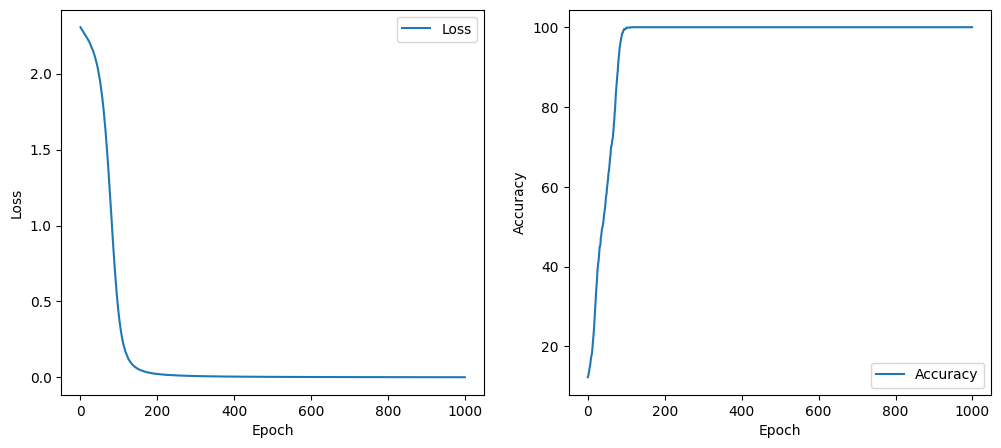

In [22]:
# Plot loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
# Alternative: use TensorBoard!
# from torch.utils.tensorboard import SummaryWriter

# # Reinstantiate the network, loss function, and optimizer
# model = SimpleNet()
# loss_fn = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.01)

# # Instantiate the TensorBoard writer
# writer = SummaryWriter()

# # Training loop
# for epoch in range(num_epochs):
#     running_loss = 0.0
#     correct = 0
#     total = 0
#     for batch_idx, (inputs, targets) in enumerate(data_loader):
#         outputs = model(inputs)
#         loss = loss_fn(outputs, targets)
        
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
        
#         running_loss += loss.item()
#         _, predicted = torch.max(outputs, 1)
#         total += targets.size(0)
#         correct += (predicted == targets).sum().item()
    
#     avg_loss = running_loss / len(data_loader)
#     accuracy = 100 * correct / total
    
#     # Log the metrics to TensorBoard
#     writer.add_scalar('Loss/train', avg_loss, epoch)
#     writer.add_scalar('Accuracy/train', accuracy, epoch)
    
#     # Print loss and accuracy after every 100 epochs
#     if (epoch + 1) % 100 == 0:
#         print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

# writer.close()

In [24]:
# import shutil

# folder_path = "runs"

# shutil.rmtree(folder_path)

# print(f"Folder '{folder_path}' has been deleted.")

## Evaluating the model

##### **Q16: How do you make predictions using a trained neural network in PyTorch?**

In [25]:
# Define a simple neural network (same as the one used for training)
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load the trained model (assume the model was saved as 'model.pth')
model = SimpleNet()
# model.load_state_dict(torch.load('model.pth'))

# Set the model to evaluation mode
model.eval()

# Example input data (batch size of 1, 784 features)
# Note: Input data should be preprocessed in the same way as during training
input_data = torch.randn(1, 784)

# Make predictions
with torch.no_grad():  # Disable gradient calculation for inference
    output = model(input_data)

# Convert the output to probabilities using softmax
probabilities = torch.softmax(output, dim=1)

# Get the predicted class (index of the highest probability)
predicted_class = torch.argmax(probabilities, dim=1)

print("Predicted class:", predicted_class.item())
print("Probabilities:", probabilities.numpy())

Predicted class: 9
Probabilities: [[0.10942324 0.09172758 0.09153328 0.0900717  0.09697043 0.11578014
  0.10719643 0.09206997 0.08558185 0.11964528]]


##### **Q17: What performance metrics can you use to evaluate a neural network?**

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Example output and target
output = torch.tensor([[0.1, 0.9], [0.8, 0.2]])
targets = torch.tensor([1, 0])

# Predictions
_, predicted = torch.max(output, 1)

# Accuracy: Proportion of correctly classified samples
accuracy = accuracy_score(targets.numpy(), predicted.numpy())
print(f"Accuracy: {accuracy:.4f}")

# Precision: Proportion of true positive predictions among all positive predictions
precision = precision_score(targets.numpy(), predicted.numpy(), average='weighted')
print(f"Precision: {precision:.4f}")

# Recall: Proportion of true positive predictions among all actual positive samples
recall = recall_score(targets.numpy(), predicted.numpy(), average='weighted')
print(f"Recall: {recall:.4f}")

# F1 score: Harmonic mean of precision and recall
f1 = f1_score(targets.numpy(), predicted.numpy(), average='weighted')
print(f"F1 Score: {f1:.4f}")

# Confusion matrix: Assesses the performance of the classification model by showing the true vs. predicted labels
cm = confusion_matrix(targets.numpy(), predicted.numpy())
print("Confusion Matrix:")
print(cm)

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[1 0]
 [0 1]]


In [27]:
from sklearn.metrics import roc_auc_score

# Example probabilities and targets for binary classification
probabilities = torch.tensor([0.1, 0.9, 0.8, 0.2])
targets_binary = torch.tensor([0, 1, 1, 0])

# ROC-AUC score: The area under the Receiver Operating Characteristic curve, which measures the ability of the model to distinguish between classes
roc_auc = roc_auc_score(targets_binary.numpy(), probabilities.numpy())
print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 1.0000


In [28]:
# In practice, for a classification model:
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleNet()

input_data = torch.randn(100, 784)
targets = torch.randint(0, 10, (100,))

# Model output
model.eval()
with torch.no_grad():
    outputs = model(input_data)

# Get predictions
_, predicted = torch.max(outputs, 1)

# Calculate metrics
accuracy = accuracy_score(targets.numpy(), predicted.numpy())
precision = precision_score(targets.numpy(), predicted.numpy(), average='weighted')
recall = recall_score(targets.numpy(), predicted.numpy(), average='weighted')
f1 = f1_score(targets.numpy(), predicted.numpy(), average='weighted')
cm = confusion_matrix(targets.numpy(), predicted.numpy())

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.0400
Precision: 0.0453
Recall: 0.0400
F1 Score: 0.0340
Confusion Matrix:
[[0 0 0 0 0 1 0 3 4 2]
 [0 0 1 0 0 1 0 4 5 2]
 [0 1 1 0 0 0 0 2 2 5]
 [0 0 1 0 0 0 0 5 3 2]
 [0 1 1 0 0 0 0 5 1 0]
 [0 0 1 1 0 1 0 5 2 0]
 [0 0 0 0 0 0 0 5 5 2]
 [0 0 1 0 0 0 0 2 1 5]
 [0 0 0 0 0 1 0 5 0 5]
 [0 0 1 0 0 0 0 3 1 0]]


c:\Users\fellm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Example output and target
output = torch.tensor([2.5, 0.0, 2.1, 1.6])
targets = torch.tensor([3.0, -0.5, 2.0, 1.5])

# MSE: Average of the squares of the differences between predicted and actual values
mse = mean_squared_error(targets.numpy(), output.numpy())
print(f"MSE: {mse:.4f}")

# MAE: Average of the absolute differences between predicted and actual values
mae = mean_absolute_error(targets.numpy(), output.numpy())
print(f"MAE: {mae:.4f}")

# R²: Proportion of the variance in the dependent variable that is predictable from the independent variable(s)
r2 = r2_score(targets.numpy(), output.numpy())
print(f"R²: {r2:.4f}")

MSE: 0.1300
MAE: 0.3000
R²: 0.9200


In [30]:
# In practice, for a regression model:
class RegressionNet(nn.Module):
    def __init__(self):
        super(RegressionNet, self).__init__()
        self.fc1 = nn.Linear(10, 64)
        self.fc2 = nn.Linear(64, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = RegressionNet()

input_data = torch.randn(100, 10)
targets = torch.randn(100, 1)

model.eval()
with torch.no_grad():
    outputs = model(input_data)

mse = mean_squared_error(targets.numpy(), outputs.numpy())
mae = mean_absolute_error(targets.numpy(), outputs.numpy())
r2 = r2_score(targets.numpy(), outputs.numpy())

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

MSE: 0.8090
MAE: 0.7598
R²: -0.1500


##### **Q18: How do you visualize the performance of a neural network using `matplotlib`?**

In [31]:
# Redefine a simple neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

input_data = torch.randn(1000, 784)
target_data = torch.randint(0, 10, (1000,))

dataset = TensorDataset(input_data, target_data)
data_loader = DataLoader(dataset, batch_size=64, shuffle=True)

model = SimpleNet()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Lists to store loss and accuracy
train_losses = []
train_accuracies = []
all_targets = []
all_predictions = []

num_epochs = 100
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(data_loader):
        outputs = model(inputs)
        loss = loss_fn(outputs, targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
        
        # Store targets and predictions for confusion matrix and ROC curve
        all_targets.extend(targets.numpy())
        all_predictions.extend(predicted.numpy())
    
    avg_loss = running_loss / len(data_loader)
    accuracy = 100 * correct / total
    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%')

Epoch [10/100], Loss: 2.2483, Accuracy: 14.80%
Epoch [20/100], Loss: 2.2790, Accuracy: 21.00%
Epoch [30/100], Loss: 2.1518, Accuracy: 31.30%
Epoch [40/100], Loss: 2.1277, Accuracy: 43.40%
Epoch [50/100], Loss: 2.0196, Accuracy: 55.70%
Epoch [60/100], Loss: 1.8716, Accuracy: 66.80%
Epoch [70/100], Loss: 1.6149, Accuracy: 79.10%
Epoch [80/100], Loss: 1.3065, Accuracy: 89.50%
Epoch [90/100], Loss: 0.9607, Accuracy: 96.50%
Epoch [100/100], Loss: 0.6077, Accuracy: 99.30%


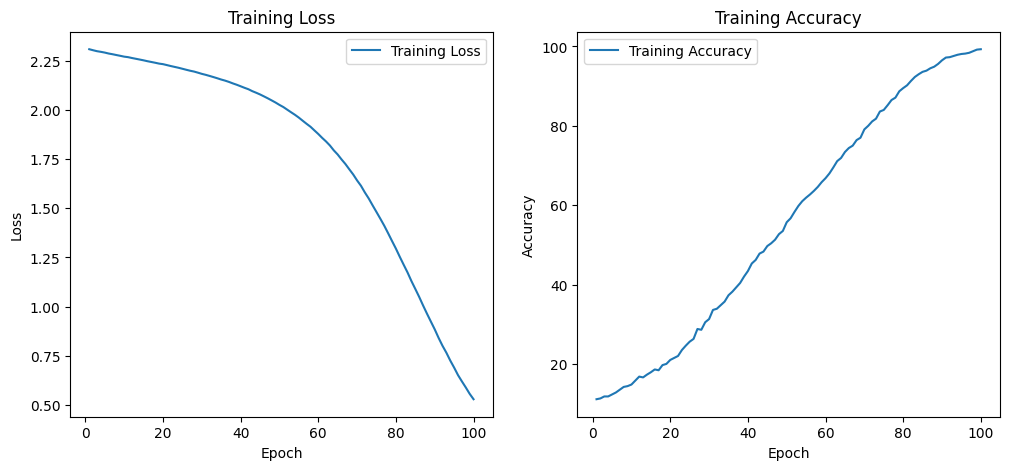

In [32]:
# Plotting training loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.show()

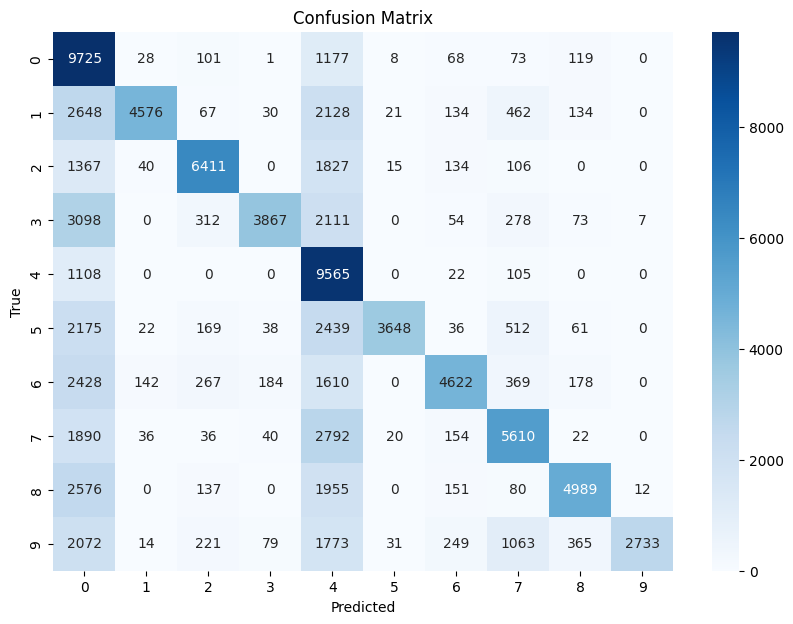

In [33]:
import seaborn as sns

# Convert lists to numpy arrays for sklearn metrics
all_targets = np.array(all_targets)
all_predictions = np.array(all_predictions)

# Confusion Matrix
cm = confusion_matrix(all_targets, all_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

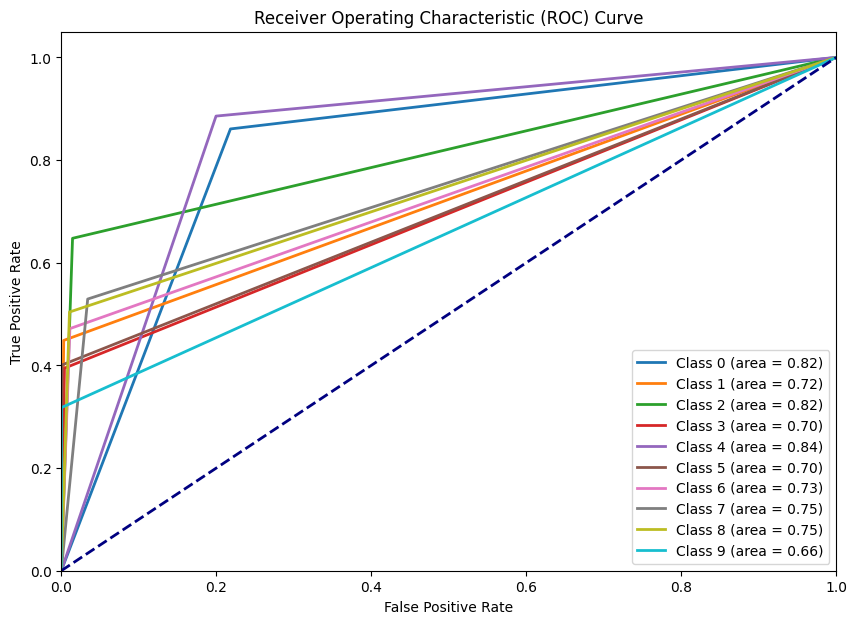

In [34]:
# For ROC curve, we need to binarize the output
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

all_targets_bin = label_binarize(all_targets, classes=range(10))
all_predictions_bin = label_binarize(all_predictions, classes=range(10))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(all_targets_bin[:, i], all_predictions_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(10):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Saving and loading the model

##### **Q19: How do you save a trained neural network model in PyTorch?**

In [35]:
# Save the model's state dictionary
torch.save(model.state_dict(), 'model.pth')
print("Model saved to 'model.pth'")

Model saved to 'model.pth'


##### **Q20: How do you load a saved neural network model in PyTorch?**

In [36]:
# Instantiate the model
model = SimpleNet()

# Load the model's state dictionary
model.load_state_dict(torch.load('model.pth'))
model.eval()  # Set the model to evaluation mode
print("Model loaded from 'model.pth'")

Model loaded from 'model.pth'


C:\Users\fellm\AppData\Local\Temp\ipykernel_11272\2203591140.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model.pth'))


In [37]:
import os

filenames = ['model.pth']

for filename in filenames:
    if os.path.exists(filename):
        os.remove(filename) 
        print(f'File {filename} deleted.')
    else:
        print(f'File {filename} not found.')

File model.pth deleted.


## Optimizations

##### **Q21: How do you perform hyperparameter tuning to improve the performance of a neural network?**

In [38]:
from sklearn.model_selection import ParameterGrid

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define a "flexible" neural network
class FlexibleNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers, dropout_rate, activation):
        super(FlexibleNet, self).__init__()
        self.num_layers = num_layers
        self.dropout = nn.Dropout(dropout_rate)
        self.activation = activation

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.hidden_layers = nn.ModuleList([nn.Linear(hidden_size, hidden_size) for _ in range(num_layers - 1)])
        self.fc_out = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self._apply_activation(self.fc1(x))
        x = self.dropout(x)
        for layer in self.hidden_layers:
            x = self._apply_activation(layer(x))
            x = self.dropout(x)
        x = self.fc_out(x)
        return x
    
    def _apply_activation(self, x):
        if self.activation == 'ReLU':
            return torch.relu(x)
        elif self.activation == 'LeakyReLU':
            return F.leaky_relu(x)
        elif self.activation == 'Tanh':
            return torch.tanh(x)
        else:
            raise ValueError(f"Unsupported activation function: {self.activation}")

# Create a synthetic dataset for demonstration
input_data = torch.randn(1000, 784)
target_data = torch.randint(0, 10, (1000,))
dataset = TensorDataset(input_data, target_data)
data_loader = DataLoader(dataset, batch_size=64, shuffle=True)

# Function to initialize the model
def create_model(input_size, hidden_size, output_size, num_layers, dropout_rate, activation):
    model = FlexibleNet(input_size, hidden_size, output_size, num_layers, dropout_rate, activation).to(device)
    return model

# Training function to include different optimizers
def train_model(model, train_loader, optimizer_name, learning_rate, num_epochs=10):
    loss_fn = nn.CrossEntropyLoss()
    if optimizer_name == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    elif optimizer_name == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer_name}")
    
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
    return running_loss / len(train_loader)

param_grid = {
    'hidden_size': [64, 128, 256],  # Hidden layer sizes
    'learning_rate': [0.01, 0.001],  # Learning rates
    'batch_size': [32, 64],  # Batch sizes
    'optimizer': ['SGD', 'Adam'],  # Optimizers
    'num_layers': [2, 3],  # Number of hidden layers
    'dropout_rate': [0.0, 0.3, 0.5],  # Dropout rates
    'activation': ['ReLU', 'LeakyReLU', 'Tanh']  # Activation functions
}

# Perform GridSearch with extended parameters
best_params = None
best_loss = float('inf')
param_combinations = list(ParameterGrid(param_grid))

for params in param_combinations:
    # print(f"Testing params: {params}")
    model = create_model(784, params['hidden_size'], 10, params['num_layers'], params['dropout_rate'], params['activation'])
    train_loader = DataLoader(dataset, batch_size=params['batch_size'], shuffle=True)
    avg_loss = train_model(model, train_loader, params['optimizer'], params['learning_rate'])
    # print(f"Average loss: {avg_loss}")
    if avg_loss < best_loss:
        best_loss = avg_loss
        best_params = params

print(f"Best params: {best_params}")
print(f"Best loss: {best_loss}")

Using device: cuda
Best params: {'activation': 'ReLU', 'batch_size': 64, 'dropout_rate': 0.0, 'hidden_size': 64, 'learning_rate': 0.01, 'num_layers': 2, 'optimizer': 'Adam'}
Best loss: 0.0005009886172047118


##### **Q22: What regularization techniques can you implement to prevent overfitting in neural networks?**

In [39]:
# Define a "flexible" neural network with additional regularization techniques
class FlexibleNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers, dropout_rate, activation, use_batch_norm=False):
        super(FlexibleNet, self).__init__()
        self.num_layers = num_layers
        self.dropout = nn.Dropout(dropout_rate)
        self.activation = activation
        self.use_batch_norm = use_batch_norm

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size) if use_batch_norm else None
        self.hidden_layers = nn.ModuleList()
        self.batch_norm_layers = nn.ModuleList()
        
        for _ in range(num_layers - 1):
            self.hidden_layers.append(nn.Linear(hidden_size, hidden_size))
            if use_batch_norm:
                self.batch_norm_layers.append(nn.BatchNorm1d(hidden_size))
        
        self.fc_out = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self._apply_activation(self.fc1(x))
        if self.bn1:
            x = self.bn1(x)
        x = self.dropout(x)
        for i, layer in enumerate(self.hidden_layers):
            x = self._apply_activation(layer(x))
            if self.use_batch_norm:
                x = self.batch_norm_layers[i](x)
            x = self.dropout(x)
        x = self.fc_out(x)
        return x
    
    def _apply_activation(self, x):
        if self.activation == 'ReLU':
            return torch.relu(x)
        elif self.activation == 'LeakyReLU':
            return F.leaky_relu(x)
        elif self.activation == 'Tanh':
            return torch.tanh(x)
        else:
            raise ValueError(f"Unsupported activation function: {self.activation}")

# Synthetic dataset
input_data = torch.randn(1000, 784)
target_data = torch.randint(0, 10, (1000,))
dataset = TensorDataset(input_data, target_data)
data_loader = DataLoader(dataset, batch_size=64, shuffle=True)

# Function to initialize the model
def create_model(input_size, hidden_size, output_size, num_layers, dropout_rate, activation, use_batch_norm=False):
    model = FlexibleNet(input_size, hidden_size, output_size, num_layers, dropout_rate, activation, use_batch_norm).to(device)
    return model

# Training function to include different optimizers and weight decay (L2 regularization)
def train_model(model, train_loader, optimizer_name, learning_rate, weight_decay, num_epochs=10):
    loss_fn = nn.CrossEntropyLoss()
    if optimizer_name == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    elif optimizer_name == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer_name}")
    
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
    return running_loss / len(train_loader)

param_grid = {
    'hidden_size': [64, 128, 256],  # Hidden layer sizes
    'learning_rate': [0.01, 0.001],  # Learning rates
    'batch_size': [32, 64],  # Batch sizes
    'optimizer': ['SGD', 'Adam'],  # Optimizers
    'num_layers': [2, 3],  # Number of hidden layers
    'dropout_rate': [0.0, 0.3, 0.5],  # Dropout rates
    'activation': ['ReLU', 'LeakyReLU', 'Tanh'],  # Activation functions
    'weight_decay': [0, 1e-4, 1e-3],  # Weight decay (L2 regularization)
    'use_batch_norm': [False, True]  # Use batch normalization
}

# Perform GridSearch with extended parameters
best_params = None
best_loss = float('inf')
param_combinations = list(ParameterGrid(param_grid))

for params in param_combinations:
    # print(f"Testing params: {params}")
    model = create_model(784, params['hidden_size'], 10, params['num_layers'], params['dropout_rate'], params['activation'], params['use_batch_norm'])
    train_loader = DataLoader(dataset, batch_size=params['batch_size'], shuffle=True)
    avg_loss = train_model(model, train_loader, params['optimizer'], params['learning_rate'], params['weight_decay'])
    # print(f"Average loss: {avg_loss}")
    if avg_loss < best_loss:
        best_loss = avg_loss
        best_params = params

print(f"Best params: {best_params}")
print(f"Best loss: {best_loss}")

Best params: {'activation': 'LeakyReLU', 'batch_size': 64, 'dropout_rate': 0.0, 'hidden_size': 128, 'learning_rate': 0.01, 'num_layers': 2, 'optimizer': 'Adam', 'use_batch_norm': False, 'weight_decay': 0}
Best loss: 0.0004498106263781665


##### **Q23: How do you use learning rate scheduling to adjust the learning rate during training?**

In [40]:
# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Redefine a "flexible" neural network with additional regularization techniques
class FlexibleNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers, dropout_rate, activation, use_batch_norm=False):
        super(FlexibleNet, self).__init__()
        self.num_layers = num_layers
        self.dropout = nn.Dropout(dropout_rate)
        self.activation = activation
        self.use_batch_norm = use_batch_norm

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size) if use_batch_norm else None
        self.hidden_layers = nn.ModuleList()
        self.batch_norm_layers = nn.ModuleList()
        
        for _ in range(num_layers - 1):
            self.hidden_layers.append(nn.Linear(hidden_size, hidden_size))
            if use_batch_norm:
                self.batch_norm_layers.append(nn.BatchNorm1d(hidden_size))
        
        self.fc_out = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self._apply_activation(self.fc1(x))
        if self.bn1:
            x = self.bn1(x)
        x = self.dropout(x)
        for i, layer in enumerate(self.hidden_layers):
            x = self._apply_activation(layer(x))
            if self.use_batch_norm:
                x = self.batch_norm_layers[i](x)
            x = self.dropout(x)
        x = self.fc_out(x)
        return x
    
    def _apply_activation(self, x):
        if self.activation == 'ReLU':
            return torch.relu(x)
        elif self.activation == 'LeakyReLU':
            return F.leaky_relu(x)
        elif self.activation == 'Tanh':
            return torch.tanh(x)
        else:
            raise ValueError(f"Unsupported activation function: {self.activation}")

input_data = torch.randn(1000, 784)
target_data = torch.randint(0, 10, (1000,))
dataset = TensorDataset(input_data, target_data)
data_loader = DataLoader(dataset, batch_size=64, shuffle=True)

def create_model(input_size, hidden_size, output_size, num_layers, dropout_rate, activation, use_batch_norm=False):
    model = FlexibleNet(input_size, hidden_size, output_size, num_layers, dropout_rate, activation, use_batch_norm).to(device)
    return model

def train_model(model, train_loader, optimizer_name, learning_rate, weight_decay, num_epochs=10, scheduler_class=None):
    loss_fn = nn.CrossEntropyLoss()
    if optimizer_name == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    elif optimizer_name == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer_name}")
    
    scheduler = None
    if scheduler_class is not None:
        if scheduler_class == optim.lr_scheduler.StepLR:
            scheduler = scheduler_class(optimizer, step_size=1, gamma=0.9)
        elif scheduler_class == optim.lr_scheduler.ExponentialLR:
            scheduler = scheduler_class(optimizer, gamma=0.9)
    
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        if scheduler is not None:
            scheduler.step()
            
    avg_loss = running_loss / len(train_loader)
    return avg_loss

param_grid = {
    'hidden_size': [64, 128, 256],  # Hidden layer sizes
    'learning_rate': [0.01, 0.001],  # Learning rates
    'batch_size': [32, 64],  # Batch sizes
    'optimizer': ['SGD', 'Adam'],  # Optimizers
    'num_layers': [2, 3],  # Number of hidden layers
    'dropout_rate': [0.0, 0.3, 0.5],  # Dropout rates
    'activation': ['ReLU', 'LeakyReLU', 'Tanh'],  # Activation functions
    'weight_decay': [0, 1e-4, 1e-3],  # Weight decay (L2 regularization)
    'use_batch_norm': [False, True],  # Use batch normalization
    'scheduler': [None, optim.lr_scheduler.StepLR, optim.lr_scheduler.ExponentialLR]  # Learning rate schedulers
}

# Grid search
best_params = None
best_loss = float('inf')
param_combinations = list(ParameterGrid(param_grid))

for params in param_combinations:
    model = create_model(784, params['hidden_size'], 10, params['num_layers'], params['dropout_rate'], params['activation'], params['use_batch_norm'])
    train_loader = DataLoader(dataset, batch_size=params['batch_size'], shuffle=True)
    scheduler_class = params['scheduler']
    avg_loss = train_model(model, train_loader, params['optimizer'], params['learning_rate'], params['weight_decay'], scheduler_class=scheduler_class)
    if avg_loss < best_loss:
        best_loss = avg_loss
        best_params = params
9
print(f"Best params: {best_params}")
print(f"Best loss: {best_loss}")

Using device: cuda
Best params: {'activation': 'ReLU', 'batch_size': 64, 'dropout_rate': 0.0, 'hidden_size': 256, 'learning_rate': 0.01, 'num_layers': 3, 'optimizer': 'Adam', 'scheduler': <class 'torch.optim.lr_scheduler.StepLR'>, 'use_batch_norm': False, 'weight_decay': 0}
Best loss: 0.00018998611312781577


## Handling real-world data

##### **Q24: How do you preprocess a real-world dataset for training a neural network?**

In [56]:
# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(titanic.head())

First few rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [57]:
# Check column data types
print("\nColumn data types:")
print(titanic.dtypes)


Column data types:
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


In [58]:
# Count missing values
print("\nMissing values in each column:")
print(titanic.isnull().sum())


Missing values in each column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [59]:
# Summary statistics
print("\nSummary statistics for numerical features:")
print(titanic.describe())

print("\nSummary statistics for categorical features:")
print(titanic.describe(include=['O']))


Summary statistics for numerical features:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

Summary statistics for categorical features:
         sex embarked  who  embark_town alive
count    891      889  891          889   891
unique     2        3    3            3     2
top     male        S  man  Southampton    no
freq     577      644  5

In [60]:
# Unique values for categorical features
print("\nUnique values in categorical columns:")
for column in titanic.select_dtypes(include=['object']).columns:
    print(f"{column}: {titanic[column].unique()}")


Unique values in categorical columns:
sex: ['male' 'female']
embarked: ['S' 'C' 'Q' nan]
who: ['man' 'woman' 'child']
embark_town: ['Southampton' 'Cherbourg' 'Queenstown' nan]
alive: ['no' 'yes']


##### **Q25: How do you handle missing data in a real-world dataset?**

In [61]:
df_simple = titanic.copy()

In [62]:
# Step 1: Identify missing data
print("\nMissing values in each column:")
print(df_simple.isnull().sum())


Missing values in each column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [63]:
# One option: remove columns with too many missing values
df_simple.drop(columns=['deck'], inplace=True)

In [64]:
# Alternative: impute missing data
df_simple['age'].fillna(df_simple['age'].median(), inplace=True)  # Fill missing values for 'age' with the median age
df_simple['embarked'].fillna(df_simple['embarked'].mode()[0], inplace=True)  # Fill missing values for 'embarked' with the mode
df_simple['embark_town'].fillna(df_simple['embark_town'].mode()[0], inplace=True)  # Fill missing values for 'embarked' with the mode

C:\Users\fellm\AppData\Local\Temp\ipykernel_11272\4183130222.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_simple['age'].fillna(df_simple['age'].median(), inplace=True)  # Fill missing values for 'age' with the median age
C:\Users\fellm\AppData\Local\Temp\ipykernel_11272\4183130222.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obj

In [65]:
df_simple.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [66]:
# Verify that there are no more missing values
print("\nMissing values after imputation:")
print(df_simple.isnull().sum())


Missing values after imputation:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


In [67]:
df_imputed = titanic.copy()

In [69]:
# Another alternative: use sklearn's SimpleImputer
from sklearn.impute import SimpleImputer

# For numerical data
imputer = SimpleImputer(strategy='median')
df_imputed['age'] = imputer.fit_transform(df_imputed[['age']]).flatten()

# For categorical data
imputer = SimpleImputer(strategy='most_frequent')
df_imputed['embarked'] = imputer.fit_transform(df_imputed[['embarked']]).flatten()
df_imputed['embark_town'] = imputer.fit_transform(df_imputed[['embark_town']]).flatten()

# Check the imputed dataframe
print(df_imputed.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [70]:
print("\nMissing values after imputation:")
print(df_imputed.isnull().sum())


Missing values after imputation:
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64


In [71]:
# Ways to handle the "deck column":
print(df_imputed['deck'].unique())

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [72]:
df_advanced = df_imputed.copy()

In [73]:
# Function to impute 'deck' based on 'pclass' and 'fare'
def impute_deck(row):
    if pd.isnull(row['deck']):
        if row['pclass'] == 1:
            return 'C'  # Assuming 'C' for first class as a common value
        elif row['pclass'] == 2:
            return 'D'  # Assuming 'D' for second class as a common value
        else:
            return 'G'  # Assuming 'G' for third class as a common value
    else:
        return row['deck']

df_imputed['deck'] = df_imputed.apply(impute_deck, axis=1)

print(df_imputed['deck'].isnull().sum())

0


In [74]:
print(df_imputed['deck'].value_counts())

deck
G    483
D    201
C    100
B     47
E     32
A     15
F     13
Name: count, dtype: int64


In [75]:
# Another way:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoder = LabelEncoder()
df_advanced['sex'] = label_encoder.fit_transform(df_advanced['sex'])
df_advanced['embarked'] = label_encoder.fit_transform(df_advanced['embarked'])
df_advanced['embark_town'] = label_encoder.fit_transform(df_advanced['embark_town'])

# Prepare data for predictive modeling
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'embark_town']
titanic_known_deck = df_advanced[df_advanced['deck'].notnull()]
titanic_unknown_deck = df_advanced[df_advanced['deck'].isnull()]

X_known = titanic_known_deck[features]
y_known = titanic_known_deck['deck']
X_unknown = titanic_unknown_deck[features]

# Encode target variable 'deck'
y_known = label_encoder.fit_transform(y_known)

# Train a RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict missing 'deck' values
deck_predictions = model.predict(X_unknown)
df_advanced.loc[df_advanced['deck'].isnull(), 'deck'] = label_encoder.inverse_transform(deck_predictions)

print(df_advanced['deck'].isnull().sum())

0


In [76]:
print(df_advanced['deck'].value_counts())

deck
F    337
E    193
D    140
C     76
G     65
B     59
A     21
Name: count, dtype: int64


In [77]:
print("\nMissing values after imputation:")
print(df_advanced.isnull().sum())


Missing values after imputation:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


In [78]:
df_advanced.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,F,2,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,C,0,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,E,2,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,C,2,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,E,2,no,True


In [79]:
df = df_advanced.copy()

##### **Q26: How do you encode categorical variables for use in a neural network?**

In [80]:
# Use label and one-hot encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
boolean_columns = df.select_dtypes(include=['bool']).columns.tolist()
print(f"Categorical columns to be encoded: {categorical_columns}")
print(f"Boolean columns to be converted: {boolean_columns}")

Categorical columns to be encoded: ['who', 'alive']
Boolean columns to be converted: ['adult_male', 'alone']


In [82]:
df.dtypes

survived          int64
pclass            int64
sex               int32
age             float64
sibsp             int64
parch             int64
fare            float64
embarked          int32
class          category
who              object
adult_male         bool
deck           category
embark_town       int32
alive            object
alone              bool
dtype: object

In [83]:
# Convert boolean columns to integers
for column in boolean_columns:
    df[column] = df[column].astype(int)

In [84]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding
df['class'] = label_encoder.fit_transform(df['class'])
df['deck'] = label_encoder.fit_transform(df['class'])

In [85]:
# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the encoded DataFrame
print("Encoded DataFrame:")
print(df_encoded.head())

Encoded DataFrame:
   survived  pclass  sex   age  sibsp  parch     fare  embarked  class  \
0         0       3    1  22.0      1      0   7.2500         2      2   
1         1       1    0  38.0      1      0  71.2833         0      0   
2         1       3    0  26.0      0      0   7.9250         2      2   
3         1       1    0  35.0      1      0  53.1000         2      0   
4         0       3    1  35.0      0      0   8.0500         2      2   

   adult_male  deck  embark_town  alone  who_man  who_woman  alive_yes  
0           1     2            2      0     True      False      False  
1           0     0            0      0    False       True       True  
2           0     2            2      1    False       True       True  
3           0     0            2      0    False       True       True  
4           1     2            2      1     True      False      False  


In [86]:
df_encoded.dtypes

survived         int64
pclass           int64
sex              int32
age            float64
sibsp            int64
parch            int64
fare           float64
embarked         int32
class            int32
adult_male       int32
deck             int64
embark_town      int32
alone            int32
who_man           bool
who_woman         bool
alive_yes         bool
dtype: object

##### **Q27: How do you split a real-world dataset into training, validation, and test sets?**

In [92]:
from sklearn.preprocessing import StandardScaler

# Define features and target variable
features = df_encoded.drop(columns=['survived'])
target = df_encoded['survived']

# Convert boolean columns to integers
bool_columns = features.select_dtypes(include=['bool']).columns
features[bool_columns] = features[bool_columns].astype(int)

# Split the data into training + validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Further split the training + validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['age', 'fare', 'sibsp', 'parch']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_val[numerical_features] = scaler.transform(X_val[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Ensure all data is numeric before conversion
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_val = X_val.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Drop any remaining columns with NaNs if any were introduced
X_train = X_train.dropna(axis=1, how='any')
X_val = X_val.dropna(axis=1, how='any')
X_test = X_test.dropna(axis=1, how='any')

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Create TensorDataset and DataLoader for each set
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("Data splitting complete.")
print(f"Training set size: {len(train_loader.dataset)}")
print(f"Validation set size: {len(val_loader.dataset)}")
print(f"Test set size: {len(test_loader.dataset)}")

Data splitting complete.
Training set size: 534
Validation set size: 178
Test set size: 179


##### **Q28: How do you train a neural network on a real-world dataset?**

In [ ]:
# Define a neural network
class SimpleNet(nn.Module):
    def __init__(self, input_size):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc3(x))
        return x

# Initialize the model, loss function, and optimizer
input_size = X_train_tensor.shape[1]
model = SimpleNet(input_size).to(device)
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 200
# best_val_loss = float('inf')

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)

    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')

Epoch [20/200], Train Loss: 0.0069, Validation Loss: 0.0048
Epoch [40/200], Train Loss: 0.0010, Validation Loss: 0.0024
Epoch [60/200], Train Loss: 0.0005, Validation Loss: 0.0004
Epoch [80/200], Train Loss: 0.0002, Validation Loss: 0.0003
Epoch [100/200], Train Loss: 0.0001, Validation Loss: 0.0001
Epoch [120/200], Train Loss: 0.0001, Validation Loss: 0.0000
Epoch [140/200], Train Loss: 0.0001, Validation Loss: 0.0000
Epoch [160/200], Train Loss: 0.0000, Validation Loss: 0.0000
Epoch [180/200], Train Loss: 0.0000, Validation Loss: 0.0000
Epoch [200/200], Train Loss: 0.0001, Validation Loss: 0.0000


In [ ]:
# Test the model
model.eval()
test_loss = 0.0
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = loss_fn(outputs, targets)
        test_loss += loss.item()

avg_test_loss = test_loss / len(test_loader)
print(f"Test Loss: {avg_test_loss:.4f}")

Test Loss: 0.0000


In [ ]:
# Calculate test accuracy
correct = 0
total = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 1.0000


## Further exercises

##### **Q29: How do you implement a neural network from scratch without using PyTorch's built-in functions?**

In [ ]:
# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of sigmoid function
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Binary cross-entropy loss
def binary_cross_entropy(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / m

# Derivative of binary cross-entropy loss with respect to predictions
def binary_cross_entropy_derivative(y_true, y_pred):
    return y_pred - y_true

In [ ]:
# Initialize weights and biases
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.01
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

# Forward pass
def forward_pass(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

# Backward pass
def backward_pass(X, y, Z1, A1, Z2, A2, W1, b1, W2, b2, learning_rate):
    m = X.shape[0]
    dZ2 = binary_cross_entropy_derivative(y, A2)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    return W1, b1, W2, b2

In [ ]:
# Training loop
def train(X, y, input_size, hidden_size, output_size, num_epochs, learning_rate):
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    for epoch in range(num_epochs):
        Z1, A1, Z2, A2 = forward_pass(X, W1, b1, W2, b2)
        loss = binary_cross_entropy(y, A2)
        W1, b1, W2, b2 = backward_pass(X, y, Z1, A1, Z2, A2, W1, b1, W2, b2, learning_rate)
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss:.4f}")
    return W1, b1, W2, b2

# Predict function
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_pass(X, W1, b1, W2, b2)
    return (A2 > 0.5).astype(int)

In [ ]:
# Preprocess the titanic dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
numerical_features = ['age', 'fare', 'sibsp', 'parch']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

X_train = X_train.values
y_train = y_train.values.reshape(-1, 1)
X_test = X_test.values
y_test = y_test.values.reshape(-1, 1)

In [ ]:
X_train.shape

(712, 15)

In [ ]:
X_test.shape

(179, 15)

In [ ]:
# Training parameters
input_size = X_train.shape[1]
hidden_size = 128
output_size = 1
num_epochs = 1000
learning_rate = 0.01

# Train the model
W1, b1, W2, b2 = train(X_train, y_train, input_size, hidden_size, output_size, num_epochs, learning_rate)

Epoch 100/1000, Loss: 0.6615
Epoch 200/1000, Loss: 0.6611
Epoch 300/1000, Loss: 0.6606
Epoch 400/1000, Loss: 0.6600
Epoch 500/1000, Loss: 0.6594
Epoch 600/1000, Loss: 0.6587
Epoch 700/1000, Loss: 0.6579
Epoch 800/1000, Loss: 0.6569
Epoch 900/1000, Loss: 0.6557
Epoch 1000/1000, Loss: 0.6542


In [ ]:
# Test the model
y_pred = predict(X_test, W1, b1, W2, b2)
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.5866


##### **Q30: How do you experiment with different neural network architectures to see their impact on performance?**

In [94]:
# Create an artificial dataset
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, n_informative=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# Define a simple neural network
class SimpleNet(nn.Module):
    def __init__(self, input_size):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Define a deeper neural network
class DeepNet(nn.Module):
    def __init__(self, input_size):
        super(DeepNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x

# Define a wider neural network
class WideNet(nn.Module):
    def __init__(self, input_size):
        super(WideNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

In [ ]:
# Train and evaluate each architecture
def train_and_evaluate(model, train_loader, test_loader, num_epochs=20, learning_rate=0.001):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    loss_fn = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        avg_train_loss = running_loss / len(train_loader)
        # print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}")
    
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            predicted = (outputs > 0.5).float()
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    
    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")
    return accuracy

# Input size is the number of features
input_size = X_train.shape[1]

# Initialize and train each model
simple_net = SimpleNet(input_size)
deep_net = DeepNet(input_size)
wide_net = WideNet(input_size)

print("\nTraining SimpleNet:")
simple_net_accuracy = train_and_evaluate(simple_net, train_loader, test_loader)

print("\nTraining DeepNet:")
deep_net_accuracy = train_and_evaluate(deep_net, train_loader, test_loader)

print("\nTraining WideNet:")
wide_net_accuracy = train_and_evaluate(wide_net, train_loader, test_loader)


Training SimpleNet:
Test Accuracy: 0.9710

Training DeepNet:
Test Accuracy: 0.9695

Training WideNet:
Test Accuracy: 0.9680


In [ ]:
# Compare the performance
print(f"\nSimpleNet Test Accuracy: {simple_net_accuracy:.4f}")
print(f"DeepNet Test Accuracy: {deep_net_accuracy:.4f}")
print(f"WideNet Test Accuracy: {wide_net_accuracy:.4f}")


SimpleNet Test Accuracy: 0.9710
DeepNet Test Accuracy: 0.9695
WideNet Test Accuracy: 0.9680


##### **Q31: How do you apply a neural network to a new dataset and evaluate its performance?**

In [95]:
# Prepare a new dataset
X_new, y_new = make_classification(n_samples=20000, n_features=40, n_classes=2, n_informative=15, random_state=42)
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_new_train = scaler.fit_transform(X_new_train)
X_new_test = scaler.transform(X_new_test)

X_new_train_tensor = torch.tensor(X_new_train, dtype=torch.float32)
y_new_train_tensor = torch.tensor(y_new_train, dtype=torch.float32).view(-1, 1)
X_new_test_tensor = torch.tensor(X_new_test, dtype=torch.float32)
y_new_test_tensor = torch.tensor(y_new_test, dtype=torch.float32).view(-1, 1)

new_train_dataset = TensorDataset(X_new_train_tensor, y_new_train_tensor)
new_test_dataset = TensorDataset(X_new_test_tensor, y_new_test_tensor)

new_train_loader = DataLoader(new_train_dataset, batch_size=32, shuffle=True)
new_test_loader = DataLoader(new_test_dataset, batch_size=32, shuffle=False)

In [ ]:
# Define a simple neural network
class SimpleNet(nn.Module):
    def __init__(self, input_size):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Initialize the model
input_size = X_new_train.shape[1]
new_model = SimpleNet(input_size).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

In [ ]:
# Train the model on the new dataset
def train_model(model, train_loader, num_epochs=20, learning_rate=0.001):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    loss_fn = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        avg_train_loss = running_loss / len(train_loader)
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}")

train_model(new_model, new_train_loader)

Epoch 1/20, Train Loss: 0.3490
Epoch 2/20, Train Loss: 0.1665
Epoch 3/20, Train Loss: 0.1271
Epoch 4/20, Train Loss: 0.1093
Epoch 5/20, Train Loss: 0.0996
Epoch 6/20, Train Loss: 0.0925
Epoch 7/20, Train Loss: 0.0872
Epoch 8/20, Train Loss: 0.0830
Epoch 9/20, Train Loss: 0.0793
Epoch 10/20, Train Loss: 0.0768
Epoch 11/20, Train Loss: 0.0739
Epoch 12/20, Train Loss: 0.0715
Epoch 13/20, Train Loss: 0.0694
Epoch 14/20, Train Loss: 0.0673
Epoch 15/20, Train Loss: 0.0659
Epoch 16/20, Train Loss: 0.0633
Epoch 17/20, Train Loss: 0.0615
Epoch 18/20, Train Loss: 0.0605
Epoch 19/20, Train Loss: 0.0590
Epoch 20/20, Train Loss: 0.0579


In [ ]:
# Evaluate the model on the new test set
def evaluate_model(model, test_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    loss_fn = nn.BCELoss()
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            test_loss += loss.item()
            predicted = (outputs > 0.5).float()
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    
    avg_test_loss = test_loss / len(test_loader)
    accuracy = correct / total
    print(f"Test Loss: {avg_test_loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    return avg_test_loss, accuracy

evaluate_model(new_model, new_test_loader)

Test Loss: 0.0872
Test Accuracy: 0.9740


(0.08719914070889354, 0.974)

##### **Q32: How do you improve neural network performance with advanced techniques like dropout or batch normalization?**

In [96]:
# Using the same dataset as in the previous question/answer:

# Define a neural network with dropout and batch normalization
class ImprovedNet(nn.Module):
    def __init__(self, input_size):
        super(ImprovedNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(0.3)
        
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(0.3)
        
        self.fc3 = nn.Linear(64, 1)
    
    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = torch.sigmoid(self.fc3(x))
        return x

# Initialize the model
input_size = X_new_train.shape[1]
improved_model = ImprovedNet(input_size).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

In [97]:
# Training
def train_model(model, train_loader, num_epochs=20, learning_rate=0.001):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    loss_fn = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        avg_train_loss = running_loss / len(train_loader)
        if (epoch + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}")

train_model(improved_model, new_train_loader, 1000)

Epoch [100/1000], Train Loss: 0.0653
Epoch [200/1000], Train Loss: 0.0597
Epoch [300/1000], Train Loss: 0.0501
Epoch [400/1000], Train Loss: 0.0528
Epoch [500/1000], Train Loss: 0.0539
Epoch [600/1000], Train Loss: 0.0560
Epoch [700/1000], Train Loss: 0.0519
Epoch [800/1000], Train Loss: 0.0509
Epoch [900/1000], Train Loss: 0.0578
Epoch [1000/1000], Train Loss: 0.0462


In [98]:
# Evaluating
def evaluate_model(model, test_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    loss_fn = nn.BCELoss()
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            test_loss += loss.item()
            predicted = (outputs > 0.5).float()
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    
    avg_test_loss = test_loss / len(test_loader)
    accuracy = correct / total
    print(f"Test Loss: {avg_test_loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    return avg_test_loss, accuracy

evaluate_model(improved_model, new_test_loader)

Test Loss: 0.1643
Test Accuracy: 0.9885


(0.16427969993650912, 0.9885)

##### **Q33: How do you interpret and visualize the decisions made by a neural network?**

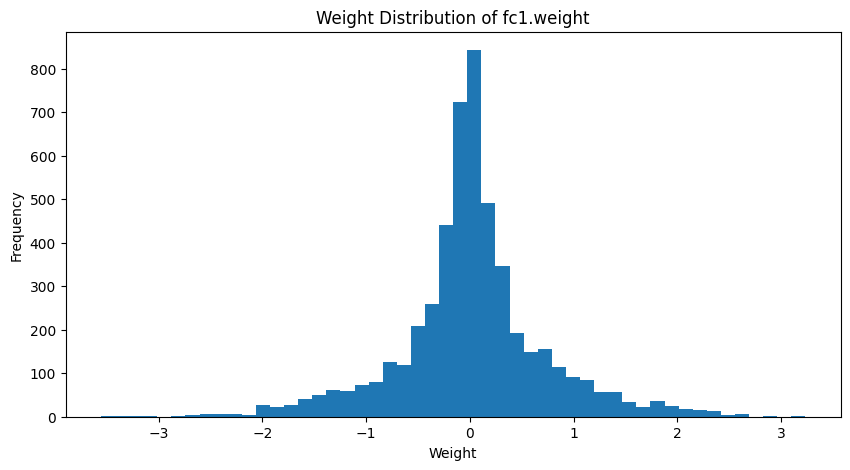

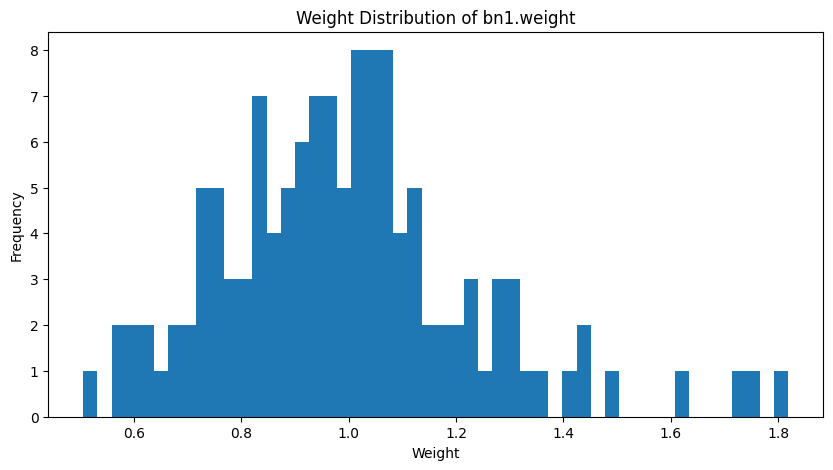

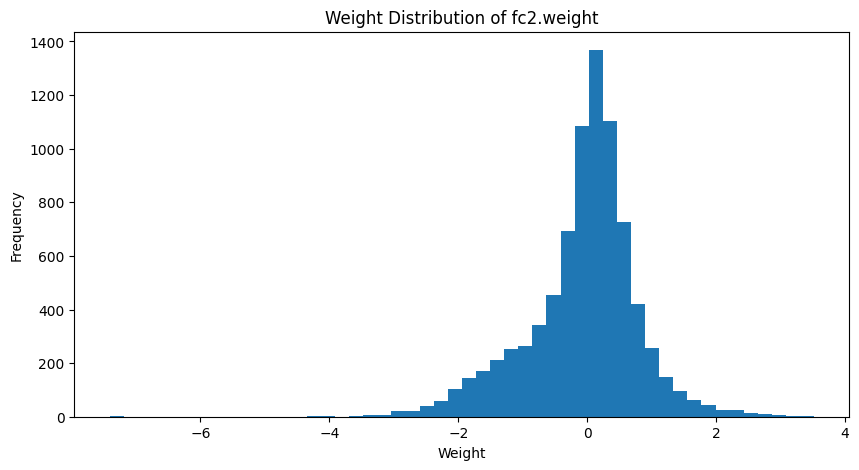

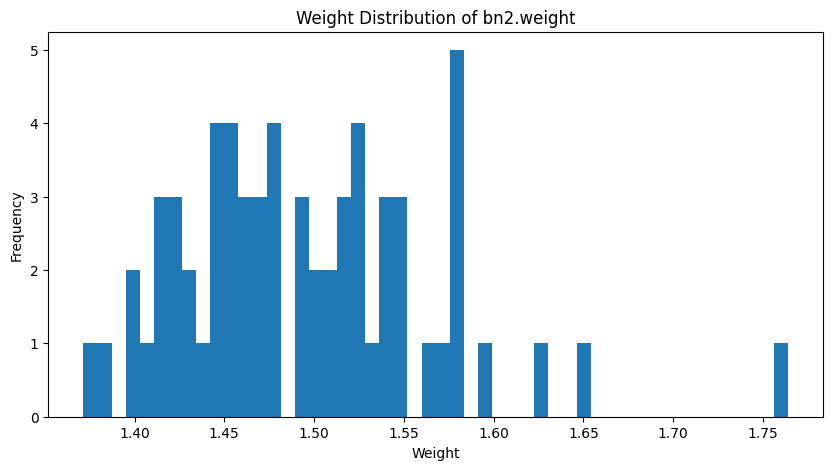

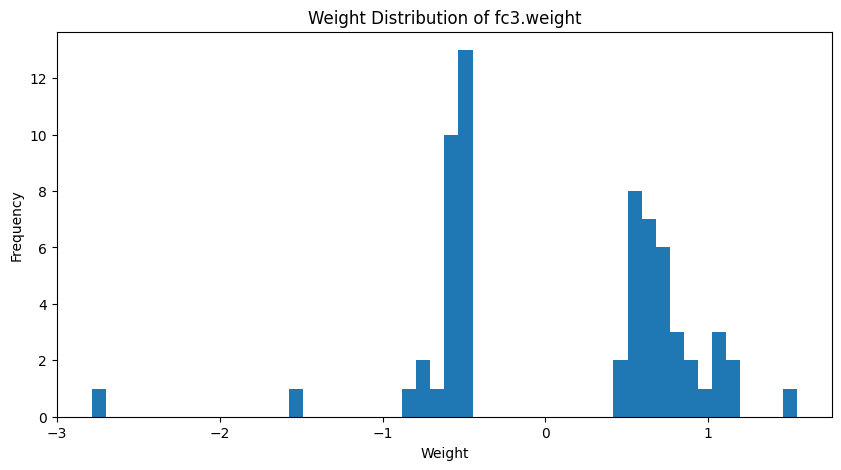

In [100]:
# Visualize model weights and biases
def visualize_weights(model):
    for name, param in model.named_parameters():
        if 'weight' in name:
            plt.figure(figsize=(10, 5))
            plt.hist(param.data.cpu().numpy().flatten(), bins=50)
            plt.title(f'Weight Distribution of {name}')
            plt.xlabel('Weight')
            plt.ylabel('Frequency')
            plt.show()

visualize_weights(improved_model)

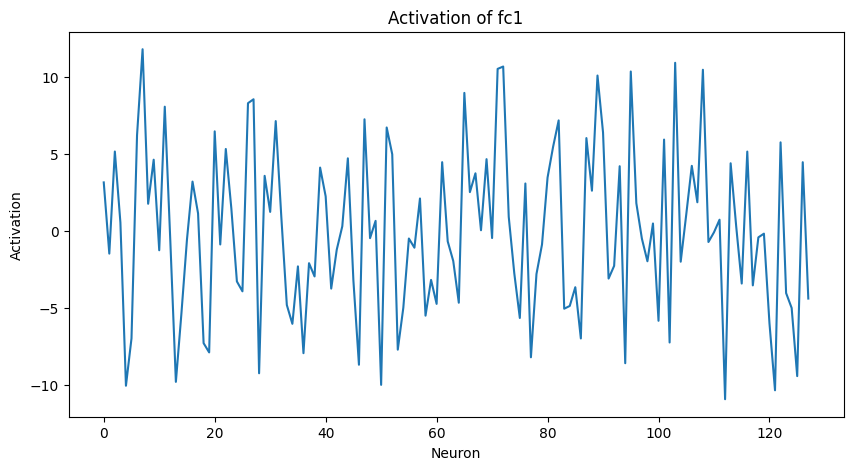

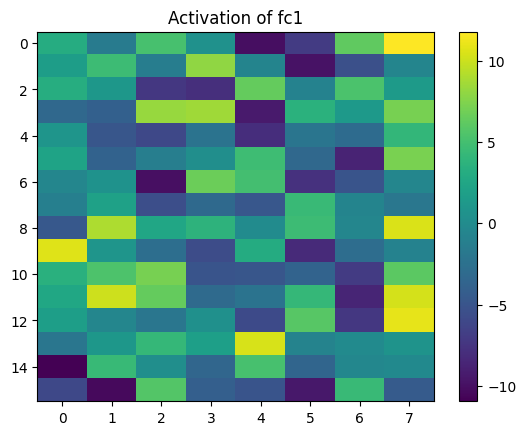

In [105]:
# Activation and feature maps
def get_activation(model, layer_name, inputs):
    activation = {}

    def hook(model, input, output):
        activation[layer_name] = output.detach()

    layer = dict([*model.named_modules()])[layer_name]
    handle = layer.register_forward_hook(hook)
    model(inputs)
    handle.remove()
    
    return activation[layer_name]

# Example usage with a single batch of data
data_iter = iter(new_test_loader)
inputs, _ = next(data_iter)
inputs = inputs.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
activation = get_activation(improved_model, 'fc1', inputs)

# If the activation is 1D, plot it as a line plot
plt.figure(figsize=(10, 5))
plt.plot(activation[0].cpu().numpy())
plt.title('Activation of fc1')
plt.xlabel('Neuron')
plt.ylabel('Activation')
plt.show()

# If the activation can be reshaped to 2D, use imshow
if activation[0].shape[0] % 8 == 0:
    plt.imshow(activation[0].cpu().numpy().reshape(-1, 8), aspect='auto', cmap='viridis')
    plt.colorbar()
    plt.title('Activation of fc1')
    plt.show()

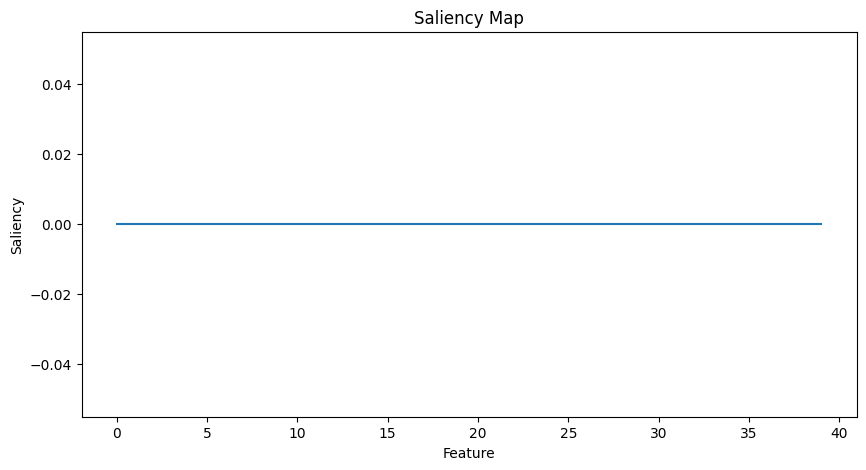

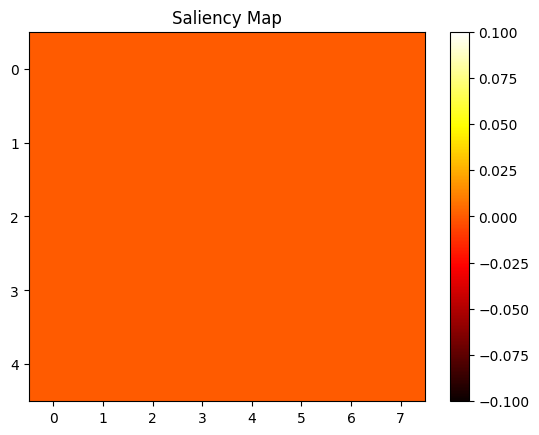

In [106]:
# Saliency map
def saliency_map(model, data, target):
    model.eval()
    data.requires_grad_()
    output = model(data)
    loss = nn.BCELoss()(output, target)
    model.zero_grad()
    loss.backward()
    saliency = data.grad.data.abs()
    return saliency

# Example usage with a single batch of data
data_iter = iter(new_test_loader)
inputs, targets = next(data_iter)
inputs, targets = inputs.to(torch.device("cuda" if torch.cuda.is_available() else "cpu")), targets.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
saliency = saliency_map(improved_model, inputs, targets)

# If the saliency map is 1D, plot it as a line plot
plt.figure(figsize=(10, 5))
plt.plot(saliency[0].cpu().numpy())
plt.title('Saliency Map')
plt.xlabel('Feature')
plt.ylabel('Saliency')
plt.show()

# If the saliency map can be reshaped to 2D, use imshow
if saliency[0].shape[0] % 8 == 0:
    plt.imshow(saliency[0].cpu().numpy().reshape(-1, 8), aspect='auto', cmap='hot')
    plt.colorbar()
    plt.title('Saliency Map')
    plt.show()

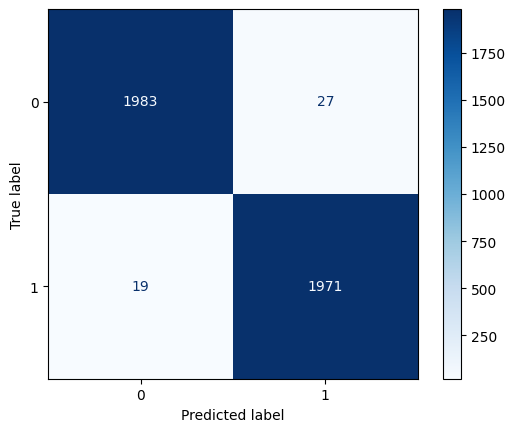

In [104]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_matrix(model, test_loader):
    all_preds = []
    all_targets = []
    model.eval()
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(torch.device("cuda" if torch.cuda.is_available() else "cpu")), targets.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
            outputs = model(inputs)
            predicted = (outputs > 0.5).float()
            all_preds.extend(predicted.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

    cm = confusion_matrix(all_targets, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

plot_confusion_matrix(improved_model, new_test_loader)